In [1]:
import pycaret
import mlflow
# check version
from pycaret.utils import version

In [2]:
# Read in the dataset 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Merged_snp_epi_data.csv")

In [5]:
# data shapes
data.dtypes

Unnamed: 0       int64
Sample          object
HIV            float64
AGE              int64
SEX              int64
                ...   
POS_4410386      int64
POS_4410765      int64
POS_4411016      int64
POS_4411276      int64
POS_4411400      int64
Length: 17642, dtype: object

In [6]:
data.shape

(216, 17642)

In [7]:
data.head()

,Unnamed: 0,Sample,HIV,AGE,SEX,STM,INH,RIF,EMB,ART,...,POS_4409794,POS_4409954,POS_4410142,POS_4410178,POS_4410212,POS_4410386,POS_4410765,POS_4411016,POS_4411276,POS_4411400
0,0,ERR038736,0.0,30,0,0.0,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,ERR038737,0.0,23,1,0.0,1.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,ERR038738,0.0,20,1,1.0,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,ERR038739,0.0,27,1,1.0,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,ERR038740,0.0,48,0,0.0,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Convert multiple columns to categorical
# Converting columns to catergorical
#columns_to_convert = ['SEX', 'HIV', 'RIF', 'INH', 'EMB', 'STM']

#ML_data[columns_to_convert] = ML_data[columns_to_convert].astype('category')

In [4]:
# Create a copy of the DataFrame
ML_data = data.copy()

In [5]:
# Removing the ART and PREVIOS TB TREATMENT COLUMN TO AVOID A LOT UN ACCURATE DATA ESPECIALLY BECAUSE THERE WAS ALOT OF MISSINGNESS
# List of columns to delete
columns_to_delete = ['ART', 'PREV.TB_TREATMENT']

# Drop the specified columns
ML_data = ML_data.drop(columns=columns_to_delete)

In [6]:
# Remove the unnamed column (assuming it's the last column, you might need to adjust the index)
ML_data = ML_data.drop(ML_data.columns[ML_data.columns.str.contains('Unnamed', case=False)], axis=1)


In [7]:
 ML_data.head()

,Sample,HIV,AGE,SEX,STM,INH,RIF,EMB,POS_1552,POS_1908,...,POS_4409794,POS_4409954,POS_4410142,POS_4410178,POS_4410212,POS_4410386,POS_4410765,POS_4411016,POS_4411276,POS_4411400
0,ERR038736,0.0,30,0,0.0,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ERR038737,0.0,23,1,0.0,1.0,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ERR038738,0.0,20,1,1.0,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ERR038739,0.0,27,1,1.0,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ERR038740,0.0,48,0,0.0,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
ML_data.dtypes

Sample          object
HIV            float64
AGE              int64
SEX              int64
STM            float64
                ...   
POS_4410386      int64
POS_4410765      int64
POS_4411016      int64
POS_4411276      int64
POS_4411400      int64
Length: 17639, dtype: object

In [8]:
# Assuming 'df' is your DataFrame
columns_to_exclude = ['Sample', 'AGE']

# Get a list of all column names
all_columns = ML_data.columns.tolist()

# Filter out columns to exclude
categorical_columns = [col for col in all_columns if col not in columns_to_exclude]

# Convert selected columns to categorical
ML_data[categorical_columns] = ML_data[categorical_columns].astype('category')


In [11]:
ML_data.dtypes

Sample           object
HIV            category
AGE               int64
SEX            category
STM            category
                 ...   
POS_4410386    category
POS_4410765    category
POS_4411016    category
POS_4411276    category
POS_4411400    category
Length: 17639, dtype: object

In [9]:
# Perform one-hot encoding
ML_data_encoded = pd.get_dummies(ML_data, columns=categorical_columns)


In [10]:
ML_data_encoded.head()

,Sample,AGE,HIV_0.0,HIV_1.0,SEX_0,SEX_1,STM_0.0,STM_1.0,INH_0.0,INH_1.0,...,POS_4410386_0,POS_4410386_1,POS_4410765_0,POS_4410765_1,POS_4411016_0,POS_4411016_1,POS_4411276_0,POS_4411276_1,POS_4411400_0,POS_4411400_1
0,ERR038736,30,1,0,1,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
1,ERR038737,23,1,0,0,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
2,ERR038738,20,1,0,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
3,ERR038739,27,1,0,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
4,ERR038740,48,1,0,1,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0


In [14]:
ML_data_encoded.dtypes

Sample           object
AGE               int64
HIV_0.0           uint8
HIV_1.0           uint8
SEX_0             uint8
                  ...  
POS_4411016_1     uint8
POS_4411276_0     uint8
POS_4411276_1     uint8
POS_4411400_0     uint8
POS_4411400_1     uint8
Length: 35116, dtype: object

In [11]:
Encoded_data = ML_data_encoded.copy()

In [16]:
Encoded_data.to_csv("Encoded_data.csv")

In [17]:
Encoded_data.head()

,Sample,AGE,HIV_0.0,HIV_1.0,SEX_0,SEX_1,STM_0.0,STM_1.0,INH_0.0,INH_1.0,...,POS_4410386_0,POS_4410386_1,POS_4410765_0,POS_4410765_1,POS_4411016_0,POS_4411016_1,POS_4411276_0,POS_4411276_1,POS_4411400_0,POS_4411400_1
0,ERR038736,30,1,0,1,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
1,ERR038737,23,1,0,0,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
2,ERR038738,20,1,0,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
3,ERR038739,27,1,0,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
4,ERR038740,48,1,0,1,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0


In [13]:
#Now for the EMB drug
# List of columns to exclude
exclude_columns2 = ['STM', 'EMB', 'RIF']

# Create a new DataFrame excluding the specified columns
inh_data = ML_data.drop(exclude_columns2, axis=1)
inh_data.head()

,Sample,HIV,AGE,SEX,INH,POS_1552,POS_1908,POS_1977,POS_2423,POS_2532,...,POS_4409794,POS_4409954,POS_4410142,POS_4410178,POS_4410212,POS_4410386,POS_4410765,POS_4411016,POS_4411276,POS_4411400
0,ERR038736,0.0,30,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ERR038737,0.0,23,1,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ERR038738,0.0,20,1,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ERR038739,0.0,27,1,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ERR038740,0.0,48,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
inh_data.dtypes

Sample           object
HIV            category
AGE               int64
SEX            category
INH            category
                 ...   
POS_4410386    category
POS_4410765    category
POS_4411016    category
POS_4411276    category
POS_4411400    category
Length: 17636, dtype: object

In [15]:
inh_data = inh_data.drop("Sample", axis = 1)

In [19]:
inh_data['INH'] = inh_data['INH'].astype('int')

In [20]:
inh_data.dtypes

HIV            category
AGE               int64
SEX            category
INH               int64
POS_1552       category
                 ...   
POS_4410386    category
POS_4410765    category
POS_4411016    category
POS_4411276    category
POS_4411400    category
Length: 17635, dtype: object

In [22]:
from pycaret.classification import *

# List of categorical columns (excluding 'AGE' and the excluded columns)
#categorical_columns3 = inh_data.columns.difference(['AGE','INH']).tolist()

# Set up PyCaret with excluded columns as targets
clf3 = setup(data=inh_data, target= 'INH', session_id=123,
             normalize=True,
             numeric_features=['AGE'],
             bin_numeric_features=['AGE'],
             feature_selection=True,
             #ignore_features=['Sample'],
             log_experiment=True, experiment_name='Drug_resistance_prediction_INH',
             train_size=0.8)  # Set train size to 80%)



[LightGBM] [Info] Number of positive: 72, number of negative: 100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4596
[LightGBM] [Info] Number of data points in the train set: 172, number of used features: 1531
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.418605 -> initscore=-0.328504
[LightGBM] [Info] Start training from score -0.328504
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

,Description,Value
0,Session id,123
1,Target,INH
2,Target type,Binary
3,Original data shape,"(216, 17635)"
4,Transformed data shape,"(216, 3527)"
5,Transformed train set shape,"(172, 3527)"
6,Transformed test set shape,"(44, 3527)"
7,Ordinal features,14127
8,Numeric features,1
9,Categorical features,17633


In [23]:
#best_inh = compare_models()
best_inh = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8317,0.8460,0.7750,0.8294,0.7875,0.6492,0.6622,206.9780
gbc,Gradient Boosting Classifier,0.8258,0.8840,0.6946,0.8774,0.7592,0.6293,0.6485,212.4440
dt,Decision Tree Classifier,0.7850,0.7779,0.7357,0.7784,0.7396,0.5587,0.5740,218.9630
lightgbm,Light Gradient Boosting Machine,0.7784,0.8598,0.6768,0.8028,0.7003,0.5333,0.5543,220.5840
rf,Random Forest Classifier,0.7676,0.8323,0.7054,0.7695,0.7164,0.5209,0.5393,210.0010
nb,Naive Bayes,0.7624,0.7516,0.6804,0.7845,0.6944,0.5049,0.5357,222.2750
et,Extra Trees Classifier,0.7556,0.8474,0.6643,0.7600,0.6903,0.4914,0.5095,215.3730
lr,Logistic Regression,0.7444,0.8325,0.6679,0.7270,0.6762,0.4705,0.4864,224.7890
svm,SVM - Linear Kernel,0.7444,0.0000,0.6411,0.7385,0.6721,0.4679,0.4819,216.7410
ridge,Ridge Classifier,0.7160,0.0000,0.6000,0.7324,0.6235,0.4056,0.4356,207.4150


In [25]:
# Obtaining a dataframe for the compare resuslts
compare_tree_models_results = pull()
compare_tree_models_results.to_csv("Plots/Top3_models_table_INH.csv")

In [30]:
model_names = ["AdaBoostClassifier",
              "GradientBoostingClassifier", 
              "DecisionTreeClassifier"]

In [31]:
#AUC plots

for i in range(3):
    #plt.subplot(int("13"+str(i+1)))
    plot_name= "ROC Curves  for  " + model_names[i] + '  (INH)'
    plot_model(best_inh[i], plot = 'auc', save=True, plot_kwargs = {'title' : plot_name})
    newname="Plots/AUC_INH"+str(i)+".png"
    
    import os
    os.rename('AUC.png', newname)

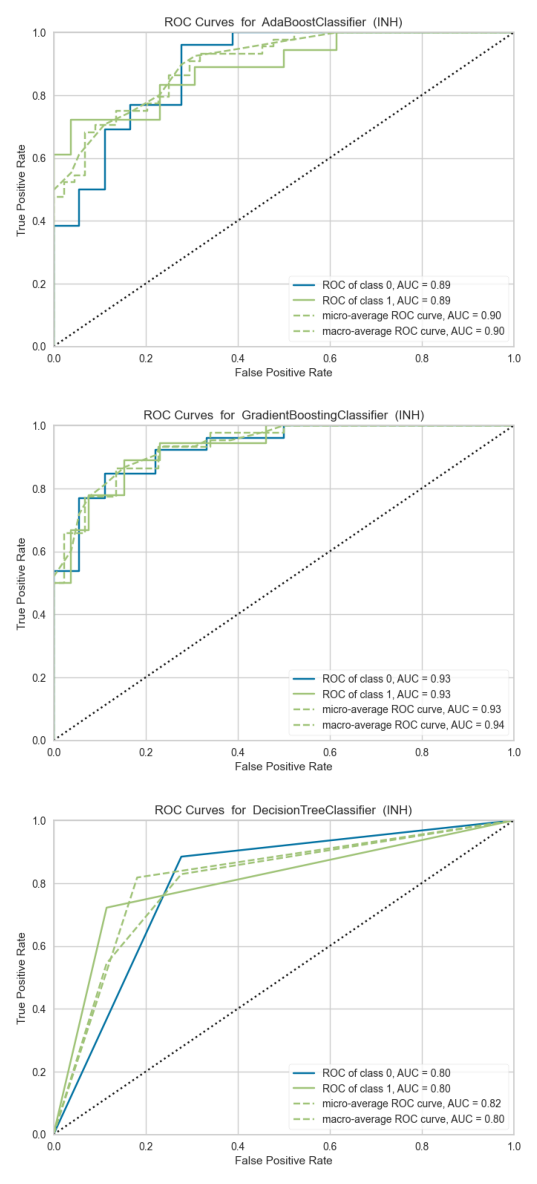

In [32]:
#AUC_RIF2.png

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the file paths
file_paths = ["Plots/AUC_INH0.png", 
              "Plots/AUC_INH1.png", 
              "Plots/AUC_INH2.png"]

# Read the PNG files
plots = [mpimg.imread(path) for path in file_paths]

# Create subplots with two rows and two columns
#fig, axes = plt.subplots(3, 1, figsize=(5, 15), gridspec_kw={'height_ratios': [1,1,1]})

fig, axes = plt.subplots(3, 1, figsize=(6, 12), gridspec_kw={'height_ratios': [1, 1, 1]})


# Display the images
for i, (plot, ax) in enumerate(zip(plots, axes.flatten())):
    ax.imshow(plot)
    ax.axis('off')
    #ax.set_title(f'Plot {i+1}')

# Adjust layout
plt.tight_layout()
# Save the plot
plt.savefig('Plots/AUC_INH_top3.png',dpi =600)
# Show the plots
plt.show()

In [33]:
#confusion_matrix
for i in range(3):
    plot_name= "Confusion Matrix  for  " + model_names[i] + '  (INH)'
    plot_model(best_inh[i], plot = 'confusion_matrix', save=True, plot_kwargs = {'title' : plot_name})
    newname="Plots/CM_INH"+str(i)+".png"
    
    import os
    os.rename('Confusion Matrix.png', newname)

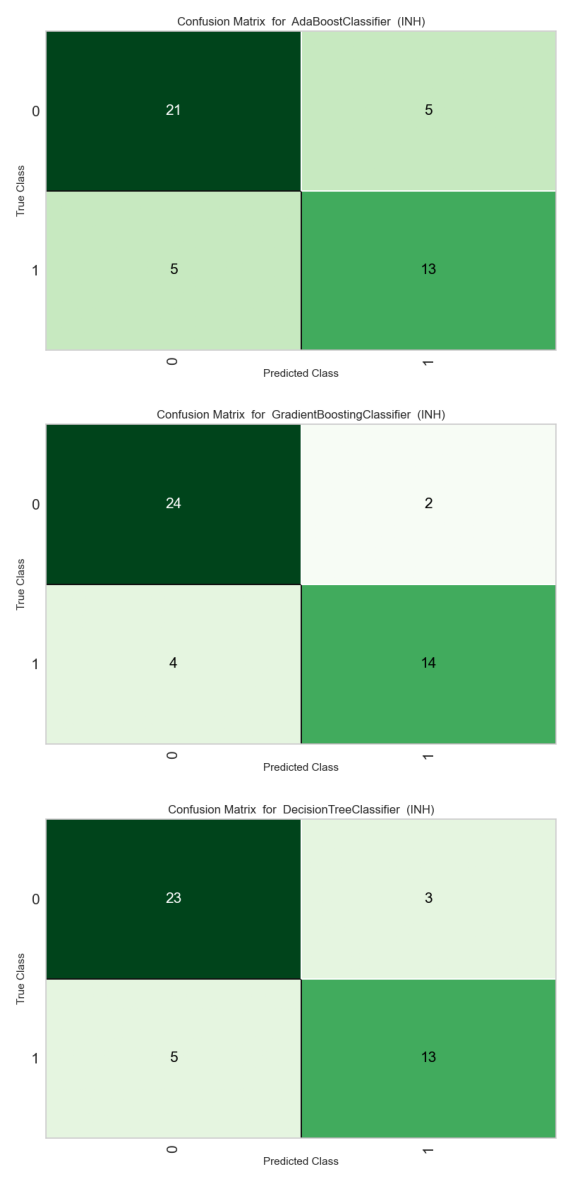

In [34]:
#Combine Confusion Matrix plots

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the file paths
file_paths = ["Plots/CM_INH0.png", 
              "Plots/CM_INH1.png", 
              "Plots/CM_INH2.png"]

# Read the PNG files
plots = [mpimg.imread(path) for path in file_paths]

# Create subplots with two rows and two columns
#fig, axes = plt.subplots(3, 1, figsize=(5, 15), gridspec_kw={'height_ratios': [1,1,1]})

fig, axes = plt.subplots(3, 1, figsize=(6, 12), gridspec_kw={'height_ratios': [1, 1, 1]})


# Display the images
for i, (plot, ax) in enumerate(zip(plots, axes.flatten())):
    ax.imshow(plot)
    ax.axis('off')
    #ax.set_title(f'Plot {i+1}')

# Adjust layout
plt.tight_layout()
# Save the plot
plt.savefig('Plots/CM_INH_top3.png',dpi =600)
# Show the plots
plt.show()

In [35]:
#Precision Recal plots
for i in range(3):
    plot_name= "Precision-Recall Curve  for  " + model_names[i] + '  (INH)'
    plot_model(best_inh[i], plot = 'pr', save=True, plot_kwargs = {'title' : plot_name})
    newname="Plots/PR_INH"+str(i)+".png"
    
    import os
    os.rename('Precision Recall.png', newname)

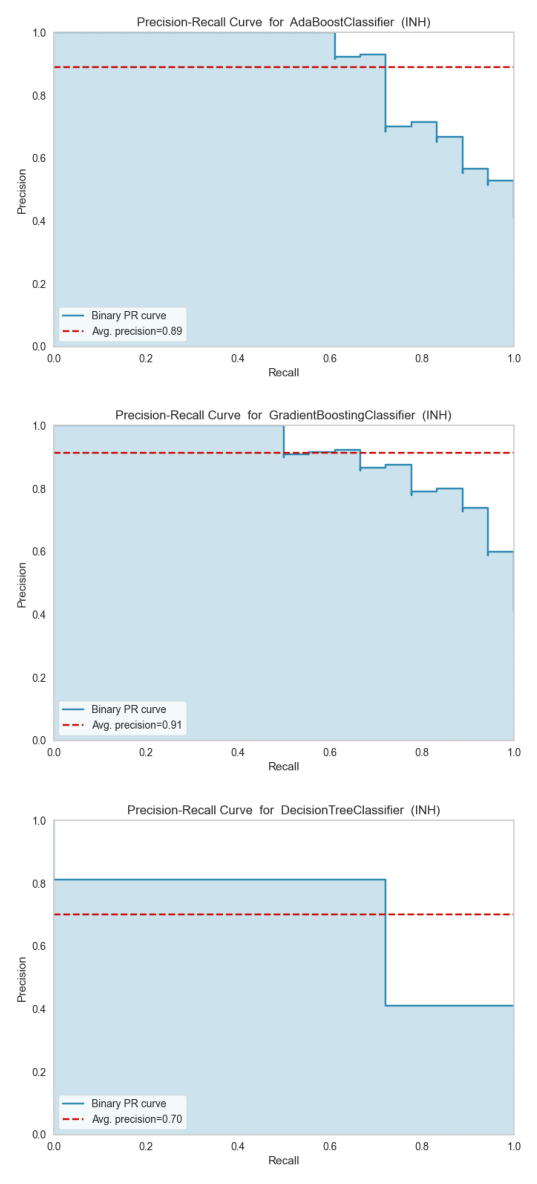

In [36]:
#Combine PR plots

# Define the file paths
file_paths = ["Plots/PR_INH0.png", 
              "Plots/PR_INH1.png", 
              "Plots/PR_INH2.png"]

# Read the PNG files
plots = [mpimg.imread(path) for path in file_paths]

# Create subplots with two rows and two columns
#fig, axes = plt.subplots(3, 1, figsize=(5, 15), gridspec_kw={'height_ratios': [1,1,1]})

fig, axes = plt.subplots(3, 1, figsize=(6, 12), gridspec_kw={'height_ratios': [1, 1, 1]})


# Display the images
for i, (plot, ax) in enumerate(zip(plots, axes.flatten())):
    ax.imshow(plot)
    ax.axis('off')
    #ax.set_title(f'Plot {i+1}')

# Adjust layout
plt.tight_layout()
# Save the plot
plt.savefig('Plots/PR_INH_top3.png',dpi =600)
# Show the plots
plt.show()

In [37]:
#Feature Importance

for i in range(3):
    plot_name= "Feature Importance Plot  for  " + model_names[i] + '  (INH)'
    plot_model(best_inh[i], plot = 'feature', save=True, plot_kwargs = {'title' : plot_name})
    newname="Plots/Feature_INH"+str(i)+".png"
    
    import os
    os.rename('Feature Importance.png', newname)

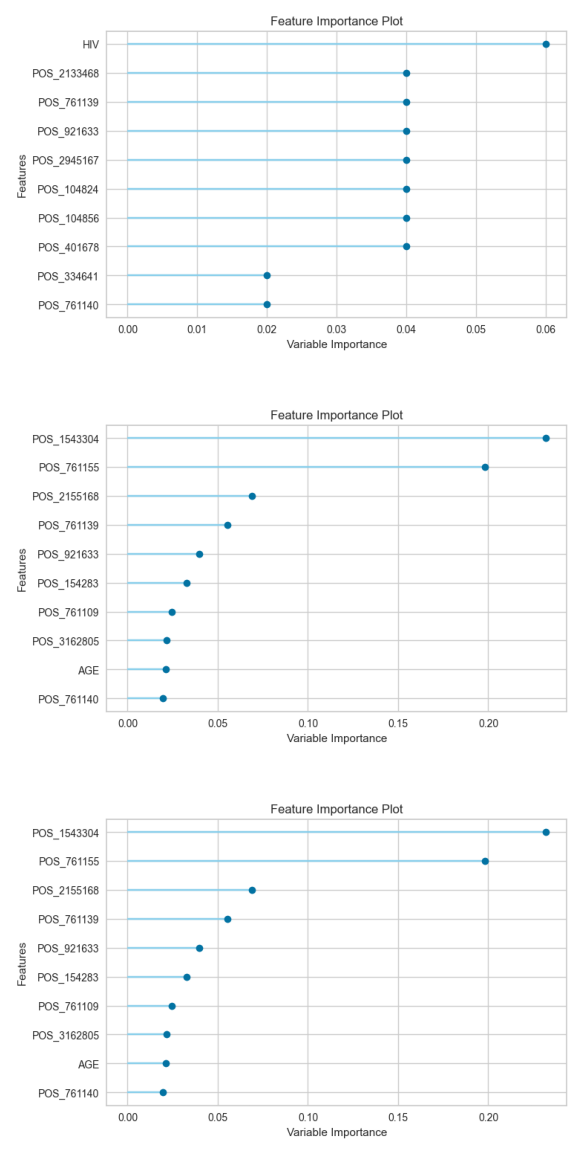

In [38]:
#Combine Feature Importance plots

# Define the file paths
file_paths = ["Plots/Feature_INH0.png", 
              "Plots/Feature_INH1.png", 
              "Plots/Feature_INH1.png"]

# Read the PNG files
plots = [mpimg.imread(path) for path in file_paths]

# Create subplots with two rows and two columns
#fig, axes = plt.subplots(3, 1, figsize=(5, 15), gridspec_kw={'height_ratios': [1,1,1]})

fig, axes = plt.subplots(3, 1, figsize=(6, 12), gridspec_kw={'height_ratios': [1, 1, 1]})


# Display the images
for i, (plot, ax) in enumerate(zip(plots, axes.flatten())):
    ax.imshow(plot)
    ax.axis('off')
    #ax.set_title(f'Plot {i+1}')

# Adjust layout
plt.tight_layout()
# Save the plot
plt.savefig('Plots/Features_INH_top3.png',dpi =600)
# Show the plots
plt.show()

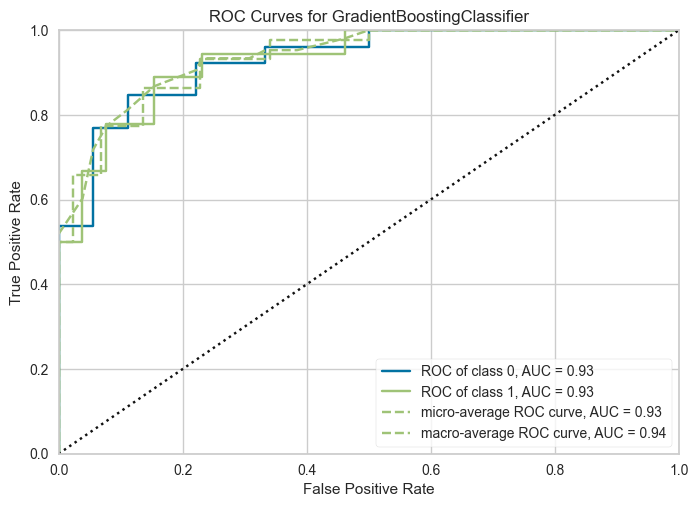

In [24]:
plot_model(best_inh[1], plot='auc')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm,metrics
from sklearn.svm import SVC,LinearSVC 
from sklearn.model_selection import KFold,StratifiedKFold
#from sklearn.metrics import matthews_corrcoef,auc, roc_curve,plot_precision_recall_curve,classification_report, confusion_matrix,average_precision_score, precision_recall_curve
from pandas.core.frame import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import imblearn
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


In [21]:
## cross validation
cv = StratifiedKFold(n_splits=5)
rf = RandomForestClassifier(n_estimators=200, random_state=0)
lr = LogisticRegression(solver = 'lbfgs',max_iter=1000)
svm = SVC(kernel='linear', probability=True)

In [110]:
RIF_data = ML_data['RIF']
RIF_data.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: RIF, dtype: category
Categories (2, float64): [0.0, 1.0]

In [25]:
EMB_data = ML_data['EMB']

In [26]:
STM_data = ML_data['STM']

In [27]:
INH_data = ML_data['INH']

In [29]:
## Removing columns from the dataset to get the predictor variables
# List of columns to delete
columns_to_delete = ['RIF', 'INH', 'STM', 'EMB']

# Drop the specified columns
ML_data_sk = ML_data.drop(columns=columns_to_delete)

In [30]:
ML_data_sk.head()

,Sample,HIV,AGE,SEX,ART,PREV.TB_TREATMENT,POS_1552,POS_1908,POS_1977,POS_2423,...,POS_4409794,POS_4409954,POS_4410142,POS_4410178,POS_4410212,POS_4410386,POS_4410765,POS_4411016,POS_4411276,POS_4411400
0,ERR038736,0.0,30,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ERR038737,0.0,23,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ERR038738,0.0,20,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,ERR038739,0.0,27,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ERR038740,0.0,48,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import category_encoders as ce

# Assuming X contains only categorical columns (except age)
# Get a list of categorical column names
categorical_columns = ML_data_sk.columns.tolist()

# Initialize Binary Encoder
encoder = ce.BinaryEncoder(cols=categorical_columns)

# Apply the encoder to X
ML_encoded = encoder.fit_transform(ML_data_sk)


In [ ]:
# Encoding the RIF dataset


In [111]:
from sklearn.model_selection import train_test_split

# Assuming X contains your features and Y contains your labels/target
X_train, X_test, Y_train, Y_test = train_test_split(Encoded_data, RIF_data, test_size=0.2, random_state=42)

In [112]:
X_train.head()

,Sample,AGE,HIV_0.0,HIV_1.0,SEX_0,SEX_1,STM_0.0,STM_1.0,INH_0.0,INH_1.0,...,POS_4410386_0,POS_4410386_1,POS_4410765_0,POS_4410765_1,POS_4411016_0,POS_4411016_1,POS_4411276_0,POS_4411276_1,POS_4411400_0,POS_4411400_1
84,ERR987731,20,0,1,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
95,ERR987742,42,1,0,0,1,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
137,ERR990532,36,0,1,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
211,SRR7535090,27,0,1,1,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
86,ERR987733,32,1,0,0,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0


In [113]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC()
